# Progetto IUM - Data Analysis
## Università di Informatica, Unito
Gruppo Federico Raso, Federico Verra

In seguito ad una analisi generale sui dati a noi forniti, abbiamo deciso di suddividere il nostro lavoro in tre sezioni, che ci avrebbero permesso di svolgere il nostro compito in modo più ordinato e sistematico possibile.
- 1 Analisi e pulizia dei dati
- 2 Domande specifiche sui film
- 3 Domande generali sui paesi


In [111]:
#import delle librerie
import pandas as pd
import geopandas as gpd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [112]:
#lettura dei file.csv originali
data_directory = "./data/"

actors_o_df = pd.read_csv(data_directory+'actors.csv')
countries_o_df = pd.read_csv(data_directory+'countries.csv')
crew_o_df = pd.read_csv(data_directory+'crew.csv')
genres_o_df = pd.read_csv(data_directory+'genres.csv')
languages_o_df = pd.read_csv(data_directory+'languages.csv')
movies_o_df = pd.read_csv(data_directory+'movies.csv')
posters_o_df = pd.read_csv(data_directory+'posters.csv')
releases_o_df = pd.read_csv(data_directory+'releases.csv')
reviews_rotten_o_df = pd.read_csv(data_directory+'rotten_tomatoes_reviews.csv')
studios_o_df = pd.read_csv(data_directory+'studios.csv')
oscar_o_df = pd.read_csv(data_directory+'the_oscar_awards.csv')

world = gpd.read_file(data_directory+'/countries/ne_110m_admin_0_countries.shp')

## 1 - Analisi e pulizia dei dati

Reviews_rotten_df

In [81]:
reviews_rotten_df = reviews_rotten_o_df.copy()
reviews_rotten_df.dtypes

rotten_tomatoes_link    object
movie_title             object
critic_name             object
top_critic                bool
publisher_name          object
review_type             object
review_score            object
review_date             object
review_content          object
dtype: object

In [82]:
reviews_rotten_df = reviews_rotten_df[['movie_title','critic_name','top_critic','publisher_name','review_type','review_score']]
reviews_rotten_df

,movie_title,critic_name,top_critic,publisher_name,review_type,review_score
0,Percy Jackson & the Olympians: The Lightning T...,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN
1,Percy Jackson & the Olympians: The Lightning T...,Louise Keller,False,Urban Cinefile,Fresh,NaN
2,Percy Jackson & the Olympians: The Lightning T...,NaN,False,FILMINK (Australia),Fresh,NaN
3,Percy Jackson & the Olympians: The Lightning T...,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5
4,Percy Jackson & the Olympians: The Lightning T...,Ethan Alter,True,Hollywood Reporter,Rotten,NaN
...,...,...,...,...,...,...
1129882,Zulu Dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5
1129883,Zulu Dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5
1129884,Zulu Dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+
1129885,Zulu Dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5


In [83]:
duplicati = reviews_rotten_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

120775


In [84]:
reviews_rotten_df = reviews_rotten_df.drop_duplicates()

Actors_df

In [85]:
actors_df = actors_o_df.copy()
actors_df.dtypes

id       int64
name    object
role    object
dtype: object

In [86]:
duplicati = actors_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

946


In [87]:
actors_df.drop_duplicates(inplace=True)
actors_df.dropna(inplace=True)

Movies_df

In [88]:
movies_df = movies_o_df.copy()
movies_df.dtypes

id               int64
name            object
date           float64
tagline         object
description     object
minute         float64
rating         float64
dtype: object

In [89]:
movies_df = movies_df[['id','name','date','minute','rating']]
movies_df.rename(columns={'name':'film_name','date':'film_date'}, inplace=True)
movies_df

,id,film_name,film_date,minute,rating
0,1000001,Barbie,2023.0,114.0,3.86
1,1000002,Parasite,2019.0,133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,140.0,4.30
3,1000004,Fight Club,1999.0,139.0,4.27
4,1000005,La La Land,2016.0,129.0,4.09
...,...,...,...,...,...
941592,1941593,神笛,NaN,NaN,NaN
941593,1941594,蟲極道蜜団子抗争編 壱ノ巻,NaN,30.0,NaN
941594,1941595,蟲極道蜜団子抗争編 弐ノ巻,NaN,30.0,NaN
941595,1941596,重生,NaN,NaN,NaN


In [90]:
duplicati = movies_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

0


In [91]:
movies_df.dropna(axis=0,inplace=True)

Oscar_df

In [113]:
oscar_df=oscar_o_df.copy()
oscar_df.dtypes

year_film         int64
year_ceremony     int64
ceremony          int64
category         object
name             object
film             object
winner             bool
dtype: object

In [114]:
oscar_df = oscar_df[['year_film','year_ceremony','category','name','film','winner']].copy()

oscar_df['year_film'] = pd.to_datetime(oscar_df['year_film'], errors='coerce', format='%Y').fillna(pd.to_datetime(oscar_df['year_film'],errors='coerce'))
oscar_df['year_ceremony'] = pd.to_datetime(oscar_df['year_ceremony'], errors='coerce', format='%Y').fillna(pd.to_datetime(oscar_df['year_ceremony'],errors='coerce'))

oscar_df.rename(columns={'year_film':'film_date','year_ceremony':'ceremony_date', 'name':'person_country','film':'film_name'}, inplace=True)

oscar_df

,film_date,ceremony_date,category,person_country,film_name,winner
0,1927-01-01,1928-01-01,ACTOR,Richard Barthelmess,The Noose,False
1,1927-01-01,1928-01-01,ACTOR,Emil Jannings,The Last Command,True
2,1927-01-01,1928-01-01,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927-01-01,1928-01-01,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927-01-01,1928-01-01,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...
10884,2023-01-01,2024-01-01,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023-01-01,2024-01-01,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023-01-01,2024-01-01,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023-01-01,2024-01-01,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [115]:
duplicati = oscar_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

7


In [116]:
oscar_df.drop_duplicates(inplace=True)

Releases_df

In [11]:
releases_df = releases_o_df.copy()
releases_df.dtypes

id          int64
country    object
date       object
type       object
rating     object
dtype: object

In [12]:
releases_df['date'] = pd.to_datetime(releases_df['date'], errors='coerce', format='%Y').fillna(pd.to_datetime(releases_df['date'],errors='coerce'))

releases_df

,id,country,date,type,rating
0,1000001,Andorra,2023-07-21,Theatrical,NaN
1,1000001,Argentina,2023-07-20,Theatrical,ATP
2,1000001,Australia,2023-07-19,Theatrical,PG
3,1000001,Australia,2023-10-01,Digital,PG
4,1000001,Austria,2023-07-20,Theatrical,NaN
...,...,...,...,...,...
1332777,1940967,USA,1909-01-01,Theatrical,NaN
1332778,1940968,Sweden,1908-11-11,Theatrical,NaN
1332779,1940969,France,1902-01-01,Theatrical,NaN
1332780,1940970,France,1902-01-01,Theatrical,NaN


In [13]:
duplicati = releases_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

0


Countries_df

In [14]:
countries_df = countries_o_df.copy()
countries_df.dtypes

id          int64
country    object
dtype: object

In [135]:
countries_df

,id,country
0,1000001,UK
1,1000001,USA
2,1000002,South Korea
3,1000003,USA
4,1000004,Germany
...,...,...
693471,1941593,China
693472,1941594,USA
693473,1941595,USA
693474,1941596,China


In [136]:
countries_df['country'] = countries_df['country'].astype('string')
print(countries_df.duplicated().sum())

0


In [142]:
countries_df.dropna(axis=0, inplace=True)

Crew_df

In [18]:
crew_df = crew_o_df.copy()
crew_df.dtypes

id       int64
role    object
name    object
dtype: object

In [137]:
crew_df['role'] = crew_df['role'].astype('string')
crew_df['name'] = crew_df['name'].astype('string')
crew_df

,id,role,name
0,1000001,Director,Greta Gerwig
1,1000001,Producer,Tom Ackerley
2,1000001,Producer,Margot Robbie
3,1000001,Producer,Robbie Brenner
4,1000001,Producer,David Heyman
...,...,...,...
4720178,1941596,Casting,线雨轩
4720179,1941596,Editor,Eric Kwong Chi-Leung
4720180,1941596,Cinematography,Kenny Tse
4720181,1941596,Composer,胡小欧


In [138]:
print(crew_df.duplicated().sum())

1282


In [139]:
crew_df.drop_duplicates(inplace=True)
print(crew_df.duplicated().sum())

0


## 2 - Domande specifiche sui film

### Il film “Please Give” è piaciuto più al pubblico o ai critici ?

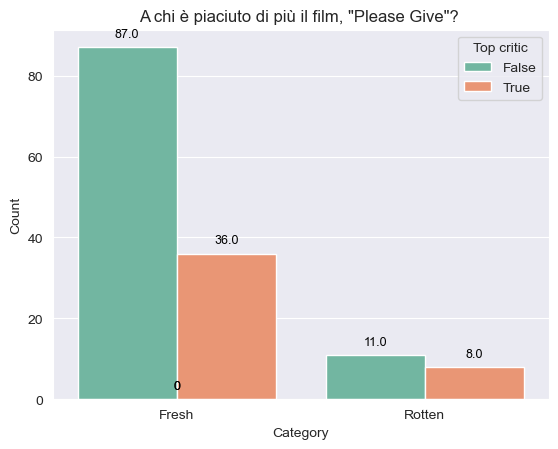

In [95]:
#Seleziono solo i record con title = "Please Give"
please_give_df = reviews_rotten_df[reviews_rotten_df['movie_title']=='Please Give'].copy()

def add_count_on_bars(ax):
    for p in ax.patches:
     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

ax = sns.countplot(x='review_type', hue='top_critic', data=please_give_df, palette='Set2')
plt.title('A chi è piaciuto di più il film, "Please Give"? ')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Top critic')
add_count_on_bars(ax)
plt.show()

Attraverso il grafico riusciamo facilmente a vedere che il film "Please Give", ha avuto successo sia tra il pubblico che la critica. 

### Quale film della saga "Harry Potter" ha ottenuto più recensioni positive?

In [92]:
#Seleziono i record  con title = "Harry Potter" e le recensioni positive type = "fresh"
harry_potter_df = reviews_rotten_df[
    (reviews_rotten_df['movie_title'].str.match(r'^Harry Potter\b', na=False)) &
    (reviews_rotten_df['review_type'] == 'Fresh')
].copy()

#controllo i nomi univoci
nomi_univoci = harry_potter_df['movie_title'].unique()
nomi_univoci

array(['Harry Potter and the Chamber of Secrets',
       'Harry Potter and the Deathly Hallows - Part 1',
       'Harry Potter and the Deathly Hallows - Part 2',
       'Harry Potter and the Goblet of Fire',
       'Harry Potter and the Half-Blood Prince',
       'Harry Potter and the Order of the Phoenix',
       'Harry Potter and the Prisoner of Azkaban',
       "Harry Potter and the Sorcerer's Stone"], dtype=object)

In [93]:
from pandas import CategoricalDtype

#Rinomino i film in base alla data di uscita
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Sorcerer's Stone", '1')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Chamber of Secrets", '2')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Prisoner of Azkaban", '3')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Goblet of Fire", '4')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Order of the Phoenix", '5')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Half-Blood Prince", '6')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Deathly Hallows - Part 1", '7 Part 1')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Deathly Hallows - Part 2", '7 Part 2')

custom_order = ["1","2","3","4","5","6","7 Part 1","7 Part 2"]

cat_type = CategoricalDtype(categories=custom_order, ordered=True)

harry_potter_df['movie_title'] = harry_potter_df['movie_title'].astype(cat_type)

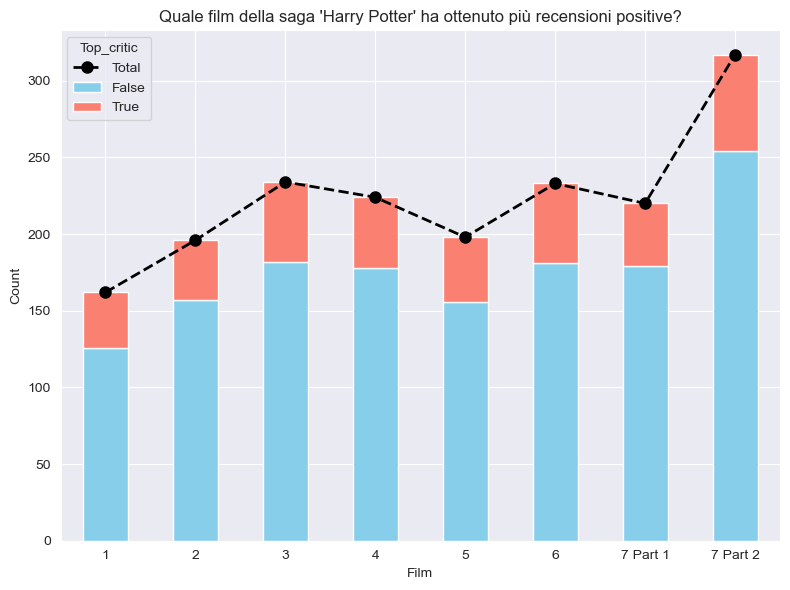

In [94]:
reviews_counts = harry_potter_df.groupby(['movie_title', 'top_critic'],observed=False)['movie_title'].count().unstack()

fig, ax = plt.subplots(figsize=(8, 6))

reviews_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=ax)

reviews_counts.sum(axis=1).plot(marker='o', color='black', linestyle='dashed', linewidth=2, markersize=8, label='Total')

plt.title("Quale film della saga 'Harry Potter' ha ottenuto più recensioni positive?")
plt.xlabel('Film')
plt.ylabel('Count')
plt.legend(title='Top_critic', loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Attraverso il grafico è facilmente visibile l'andamento della saga. Il maggior successo l'ha avuto il film "Harry Potter and the Deathly Hallows - Part 2", l'ultimo film di Harry Potter.

### In quanti film un attore ha recitato nella sua vita?

In [96]:
#raggruppo per ogni attore tutti i film in cui ha recitato
movies_per_actor = actors_df.groupby('name').size().reset_index(name='movies')

movies_per_actor = movies_per_actor[movies_per_actor['movies']<10]

#conto il numero di film recitati per attore
movies_number = movies_per_actor['movies'].value_counts().reset_index()
movies_number.columns = ['numero_film', 'frequenza']

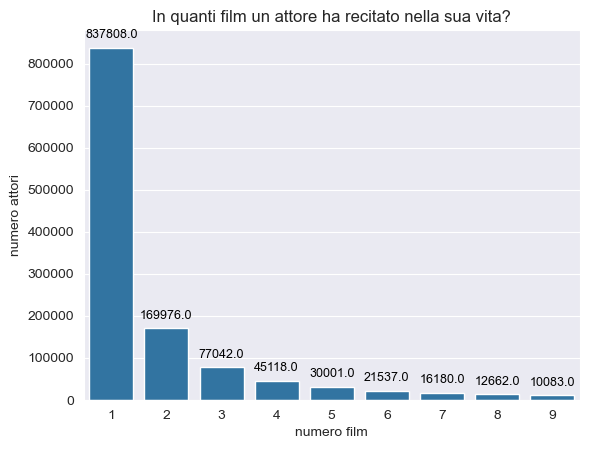

In [98]:
def add_count_on_bars(ax):
   
    for p in ax.patches:
     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

ax = sns.barplot(data=movies_number, x='numero_film', y='frequenza')

plt.title('In quanti film un attore ha recitato nella sua vita?')
plt.xlabel('numero film')
plt.ylabel('numero attori')
add_count_on_bars(ax)
plt.show()

Il grafico sopra non rappresenta tutti i dati a disposizione, ma solo una parte. Il trend è comunque chiaro: la maggior parte degli attori ha recitato solo in un film. Se ci si pensa è un risultato aspettato, considerando che l'ambiente della recitazione è molto competitivo e saturo, in cui è difficile emergere.

### Nel tempo come si è evoluta la lunghezza dei film ? 

In [99]:
#Rinomina le colonne
time_df =movies_df[['id', 'film_date', 'minute']].copy()
new_names = {'film_date':'year','minute': 'length'}
time_df=time_df.rename(columns=new_names)

#Limitare il tempo e le date
time_df = time_df[time_df['length']>60 ]
time_df = time_df[time_df['length']<300]
time_df['year']= time_df['year'].astype(int)
average_length = time_df.groupby('year')['length'].mean().reset_index()
average_length = average_length[average_length['year'] < 2025]

In [100]:
fig = px.scatter(
    average_length,
    x="year",
    y="length",
    animation_frame="year",
    title="Evoluzione della lunghezza dei film negli anni",
    labels={'year': 'Anno', 'length': 'Durata (minuti)'},
    range_x=[1899, 2024],
    range_y=[60, 160]
)

# Modifica del tracciato per includere linea e marker
fig.update_traces(mode="lines+markers", marker=dict(size=15, color='blue'))

# Configurazione del layout
fig.update_layout(
    xaxis=dict(title="Anno"),
    yaxis=dict(title="Durata (minuti)"),
    showlegend=False
)
fig.add_trace(
    go.Scatter(
        x=average_length['year'],
        y=average_length['length'],
        mode='lines',
        line=dict(color='gray', width=2),
        showlegend=False
    )
)

fig.show()

Attraverso il grafico si può notare che all'inizio del 900' la duranta dei film variava molto, mentre con il passare degli anni si stabilizzo in un range ben definito tra i 90 - 120 minuti a film.

## Domande generali sui paesi 

### Esiste una correlazione tra numero di attori, operatori, durata e valutazione dei film?

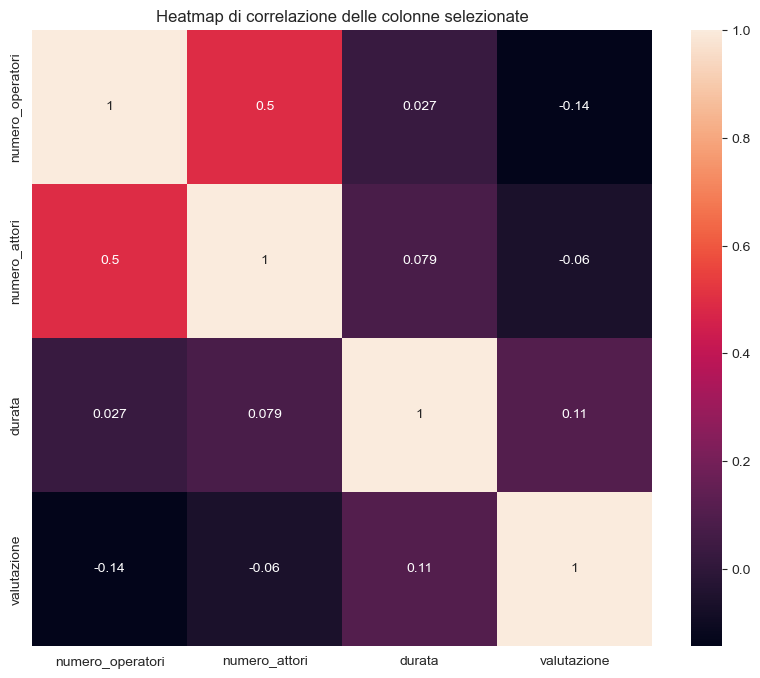

In [101]:
movies_to_merge = movies_df[['id', 'film_name', 'minute', 'rating']].copy()

crew_count = crew_df.groupby('id')['name'].count().reset_index(name = 'numero_operatori')
actors_count = actors_df.groupby('id')['name'].count().reset_index(name = 'numero_attori')

merged_df = pd.merge(movies_to_merge, crew_count, on='id')
merged_df = pd.merge(merged_df, actors_count, on='id')

merged_df.dropna(inplace=True)

merged_df.rename(columns = {'minute' : 'durata', 'rating' : 'valutazione'}, inplace = True)
merged_df = merged_df[['numero_operatori', 'numero_attori', 'durata', 'valutazione']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(merged_df, annot=True)
plt.title('Heatmap di correlazione delle colonne selezionate')
plt.show()

Dal grafico si può notare che non vi sono correlazioni tra le categorie numero_operatori, numero_attori, durata e valutazione.

### Quale paese ha vinto più oscar per miglior film in lingua straniera?

In [117]:
# Seleziono i vincitori di un Oscar per miglior film in lingua straniera
oscar_win_df = oscar_df.loc[
    (oscar_df['winner'] == True) & 
    (oscar_df['category'].isin(['FOREIGN LANGUAGE FILM']))].copy()

In [118]:
#Rinomino dei paesi 
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Union of Soviet Socialist Republics', 'Russia')
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Federal Republic of Germany', 'Germany')
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Italy; Dino De Laurentiis and Carlo Ponti, Producers', 'Italy')
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Bosnia & Herzegovina', 'Bosnia and Herzegovina')

In [133]:
#Conto quante occorrenze ha ogni paese 
conteggi = oscar_win_df['person_country'].value_counts()

conteggi_df = conteggi.reset_index()
conteggi_df.columns = ['country', 'count']  
conteggi_df

,country,count
0,Italy,11
1,France,9
2,Russia,4
3,Spain,4
4,Germany,3
5,Denmark,3
6,The Netherlands,3
7,Sweden,3
8,Austria,2
9,Switzerland,2


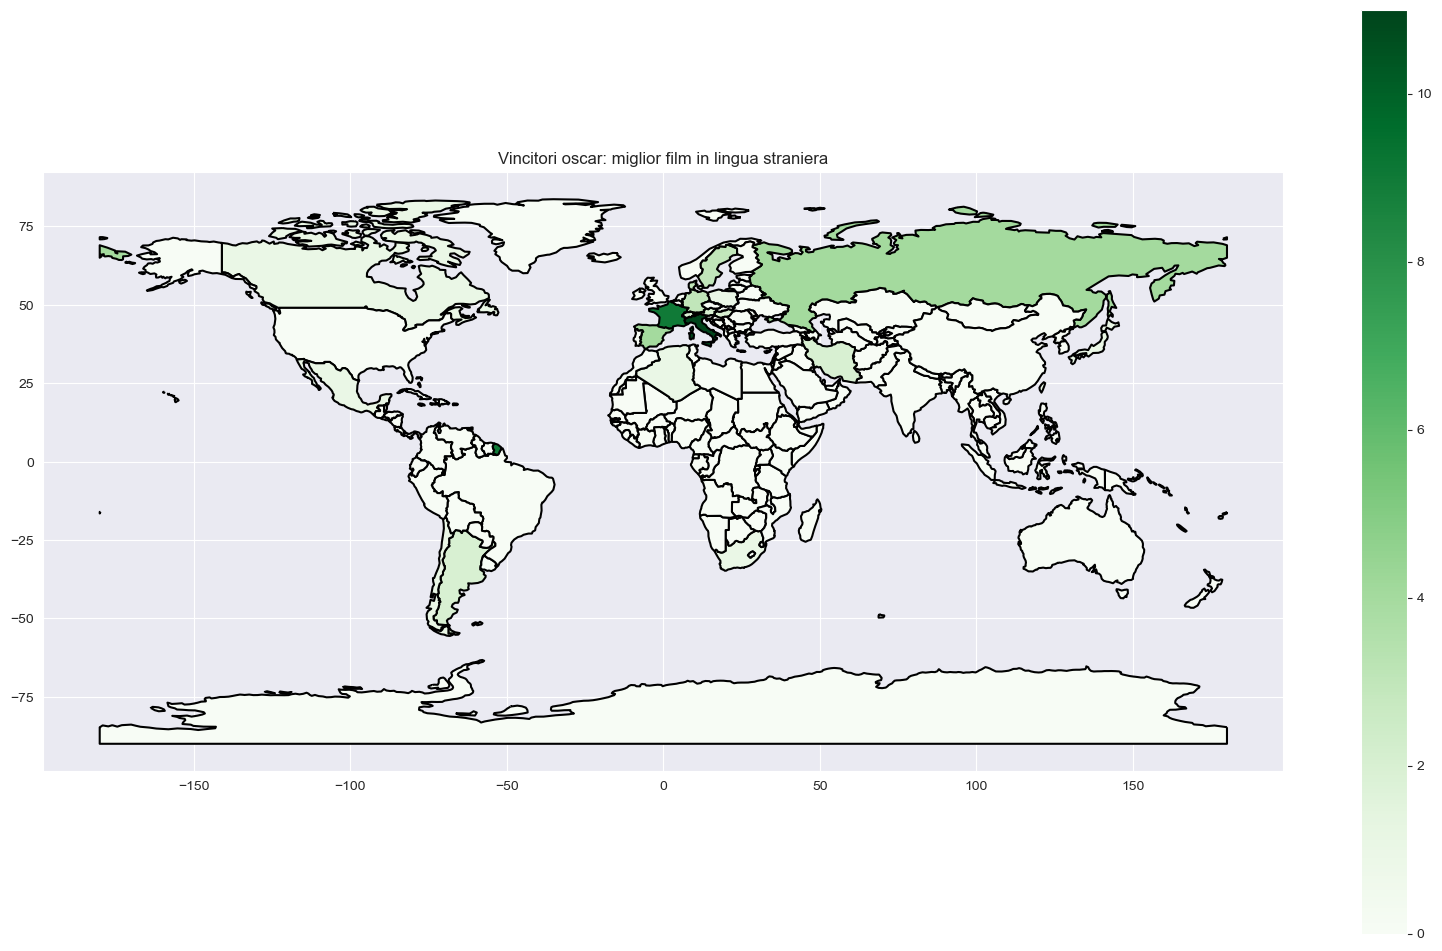

In [130]:
#Rappresento graficamente 
merged = world.merge(conteggi_df,how='left',left_on='NAME',right_on='country')
merged['count']=merged['count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(20, 12))

cmap = 'Greens'  
vmin, vmax = merged['count'].min(), merged['count'].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

merged.plot(column='count', ax=ax, cmap=cmap, norm=norm, legend=True,
            edgecolor='black', linewidth=1.5)
plt.title('Vincitori oscar: miglior film in lingua straniera')
plt.show()

Attraverso il grafico si può facilmente notare che i due paesi con più oscar vinti per miglior film in lingua straniera sono Italia e Francia.

### Chi ha prodotto più film?

In [151]:
movies_per_year_df = movies_df[['id', 'film_date']].copy()
movies_per_year_df.dropna(axis=0,inplace=True)

new_country_df = countries_df.copy()
new_country_df.dropna(axis=0,inplace=True)

In [152]:
movies_per_year_df = pd.merge(movies_per_year_df,new_country_df,on='id',how='left')
movies_per_year_df.head()

,id,film_date,country
0,1000001,2023.0,UK
1,1000001,2023.0,USA
2,1000002,2019.0,South Korea
3,1000003,2022.0,USA
4,1000004,1999.0,Germany


In [153]:
movies_per_year_df.isnull().sum()

id              0
film_date       0
country      3244
dtype: int64

In [154]:
movies_per_year_df.dropna(axis=0,inplace=True)
movies_per_year_df.isnull().sum()

id           0
film_date    0
country      0
dtype: int64

In [155]:
print(movies_per_year_df.duplicated().sum())

0


In [156]:
movies_per_year_df['country'] = movies_per_year_df['country'].replace('State of Palestine','Palestine')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('USSR','Russia')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('Democratic Republic of Congo','Dem. Rep. Congo')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('Russian Federation','Russia')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('Central African Republic','Central African rep.')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('South Sudan','S. Sudan')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('Bolivarian Republic of Venezuela','Venezuela')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('UK','United Kingdom')
all_countries = movies_per_year_df['country'].unique().tolist()

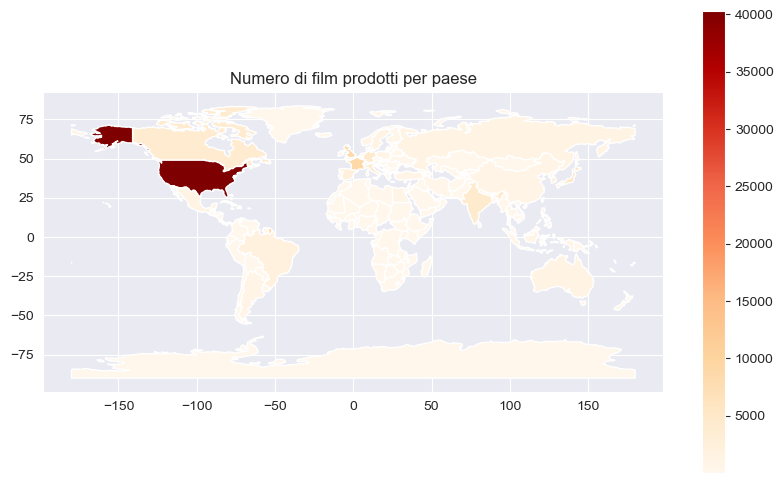

In [157]:
country_count = movies_per_year_df['country'].value_counts().reset_index()
country_count.columns = ['country','film_count']

country_count['country']= country_count['country'].replace('USA', 'United States of America')
merged = world.merge(country_count, left_on='NAME', right_on='country', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column='film_count', cmap='OrRd', legend=True, ax=ax)
ax.set_title('Numero di film prodotti per paese')
countries_world = world['NAME'].unique().tolist()
set_countries_world = set(countries_world)
set_all_countries= set(all_countries)
countries_not_in_reference = set_all_countries - set_countries_world
countries_not_in_reference = list(countries_not_in_reference)

plt.show()

Attraverso la mappa è facilmente visibile che la maggior parte dei film sia stata prodotta dagli USA, un risultato aspettato visto il grande sviluppo nell'ambito cinematografico americano

### Come vengono maggiormente trasmessi i film, nei vari paesi?

In [36]:
#Rinomino dei paesi
releases_df['country'] = releases_df['country'].replace('Democratic Republic of Congo', 'Dem. Rep. Congo')
releases_df['country'] = releases_df['country'].replace('USSR', 'Russia')
releases_df['country'] = releases_df['country'].replace('UK', 'United Kingdom')
releases_df['country'] = releases_df['country'].replace('USA', 'United States of America')
releases_df['country'] = releases_df['country'].replace('United State of America', 'United States of America')
releases_df['country'] = releases_df['country'].replace('Bolivarian Republic of Venezuela', 'Venezuela')

In [37]:
#Creo dei sottogruppi divisi per paese e ne ritorno la type maggiore per ognuno di essi
type_country_df = releases_df.groupby('country')['type'].agg(pd.Series.mode).reset_index()

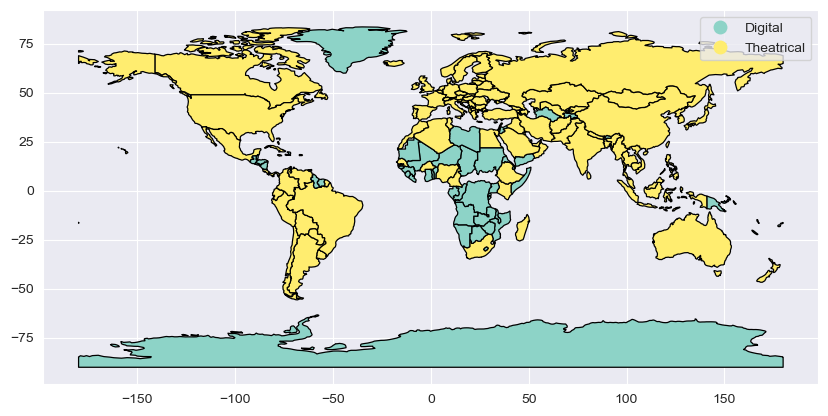

In [38]:
#Rappresento graficamente
merged = world.merge(type_country_df,how='inner',left_on='NAME',right_on='country')

fig, ax = plt.subplots(figsize=(10, 16)) 

merged.plot(ax=ax,  edgecolor='black', linewidth=0.9, column='type', legend=True, cmap='Set3')
plt.show()

Attraverso la mappa si può notare come la maggior parte dei sistemi di divulgazioni dei film sia in formato Digital e Theatrical